# YOLO Detection on Enhanced Images

## Objective
This notebook evaluates YOLO object detection performance on enhanced images
generated by the Retinex-based enhancement pipeline and compares the results
with baseline detection on raw low-light images.


In [1]:
from ultralytics import YOLO
import os
import cv2
import matplotlib.pyplot as plt


In [2]:
model = YOLO("yolov8n.pt")


In [3]:
# Enhanced images from Notebook 04
ENHANCED_IMG_DIR = "../results/enhanced_images"

# YOLO output (enhanced)
ENHANCED_OUT_PROJECT = "results/detection_outputs/enhanced"
ENHANCED_RUN_NAME = "enhanced_images"


In [5]:
from ultralytics import YOLO
import os

model = YOLO("yolov8n.pt")

ENHANCED_IMG_DIR = "../results/enhanced_images"

PROJECT_PATH = "results/detection_outputs/enhanced"
RUN_NAME = "enhanced_images"

image_files = sorted(os.listdir(ENHANCED_IMG_DIR))

for img_name in image_files:
    img_path = os.path.join(ENHANCED_IMG_DIR, img_name)

    model(
        img_path,
        conf=0.10,
        iou=0.45,
        save=True,
        project=PROJECT_PATH,
        name=RUN_NAME,
        exist_ok=True
    )

print("YOLO inference on enhanced images completed.")



image 1/1 c:\IMAGE_ENHANCEMENT_YOLO_DETECTION\notebooks\..\results\enhanced_images\1.png: 640x640 1 refrigerator, 2 books, 1 toothbrush, 16.5ms
Speed: 5.1ms preprocess, 16.5ms inference, 32.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to C:\IMAGE_ENHANCEMENT_YOLO_DETECTION\notebooks\runs\detect\results\detection_outputs\enhanced\enhanced_images

image 1/1 c:\IMAGE_ENHANCEMENT_YOLO_DETECTION\notebooks\..\results\enhanced_images\111.png: 640x640 1 person, 1 car, 1 cup, 1 orange, 1 vase, 31.5ms
Speed: 13.6ms preprocess, 31.5ms inference, 7.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to C:\IMAGE_ENHANCEMENT_YOLO_DETECTION\notebooks\runs\detect\results\detection_outputs\enhanced\enhanced_images

image 1/1 c:\IMAGE_ENHANCEMENT_YOLO_DETECTION\notebooks\..\results\enhanced_images\146.png: 640x640 1 tie, 1 chair, 1 clock, 27.1ms
Speed: 9.2ms preprocess, 27.1ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to C:\IMAGE_E

FileNotFoundError: No images or videos found in ../results/enhanced_images\detection_outputs. Supported formats are:
images: {'jpeg', 'webp', 'jpg', 'tif', 'png', 'heic', 'pfm', 'bmp', 'mpo', 'tiff', 'dng'}
videos: {'asf', 'wmv', 'm4v', 'mov', 'gif', 'webm', 'mp4', 'mpeg', 'avi', 'mpg', 'ts', 'mkv'}

In [6]:
import os

ENHANCED_PREDICT_DIR = "runs/detect/results/detection_outputs/enhanced/enhanced_images"

print("Exists:", os.path.exists(ENHANCED_PREDICT_DIR))
print("Files:", os.listdir(ENHANCED_PREDICT_DIR)[:5])


Exists: True
Files: ['1.jpg', '111.jpg', '146.jpg', '179.jpg', '23.jpg']


Baseline exists: True
Enhanced exists: True


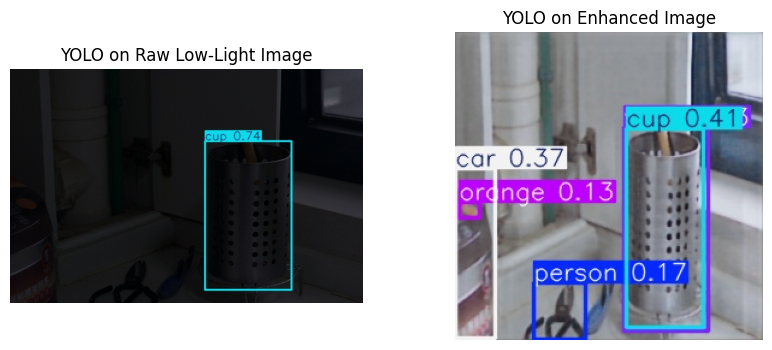

In [7]:
import os
import cv2
import matplotlib.pyplot as plt

BASELINE_DIR = "runs/results/detection_outputs/baseline/raw_lowlight"
ENHANCED_DIR = "runs/detect/results/detection_outputs/enhanced/enhanced_images"

print("Baseline exists:", os.path.exists(BASELINE_DIR))
print("Enhanced exists:", os.path.exists(ENHANCED_DIR))

raw_img_name = os.listdir(BASELINE_DIR)[1]
enh_img_name = os.listdir(ENHANCED_DIR)[1]

raw_img = cv2.imread(os.path.join(BASELINE_DIR, raw_img_name))
enh_img = cv2.imread(os.path.join(ENHANCED_DIR, enh_img_name))

raw_img = cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB)
enh_img = cv2.cvtColor(enh_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(raw_img)
plt.title("YOLO on Raw Low-Light Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(enh_img)
plt.title("YOLO on Enhanced Image")
plt.axis("off")

plt.show()
